# Clusterização de Clientes

Seleção dos grupos de clientes que possuem maiores chances de receberem notificação de ofertas de produtos a partir dos históricos de compras por eles realizados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', sep = '\t')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

In [ ]:
df.isna().sum().sum()

0

## Categóricas

In [ ]:
df_class = df[['Education', 'Marital_Status']]

In [ ]:
one_hot = OneHotEncoder()

In [ ]:
for col in df_class:  
  one_hot_data = one_hot.fit_transform(df[[col]]).toarray()
  one_hot_columname = one_hot.get_feature_names([col])
  df_onehot = pd.DataFrame(one_hot_data, columns= one_hot_columname)
  df = df.drop(columns=col).join(df_onehot)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [ ]:
df.drop(columns='Z_Revenue', inplace = True)
df.drop(columns='Z_CostContact', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Income                   2240 non-null   float64       
 3   Kidhome                  2240 non-null   int64         
 4   Teenhome                 2240 non-null   int64         
 5   Dt_Customer              2240 non-null   datetime64[ns]
 6   Recency                  2240 non-null   int64         
 7   MntWines                 2240 non-null   int64         
 8   MntFruits                2240 non-null   int64         
 9   MntMeatProducts          2240 non-null   int64         
 10  MntFishProducts          2240 non-null   int64         
 11  MntSweetProducts         2240 non-null   int64         
 12  MntGoldProds             2240 non-

In [ ]:
df_class['Education'].value_counts().sort_values()

Basic           54
2n Cycle       203
Master         370
PhD            486
Graduation    1127
Name: Education, dtype: int64

In [ ]:
df_class['Marital_Status'].value_counts().sort_values()

YOLO          2
Absurd        2
Alone         3
Widow        77
Divorced    232
Single      480
Together    580
Married     864
Name: Marital_Status, dtype: int64

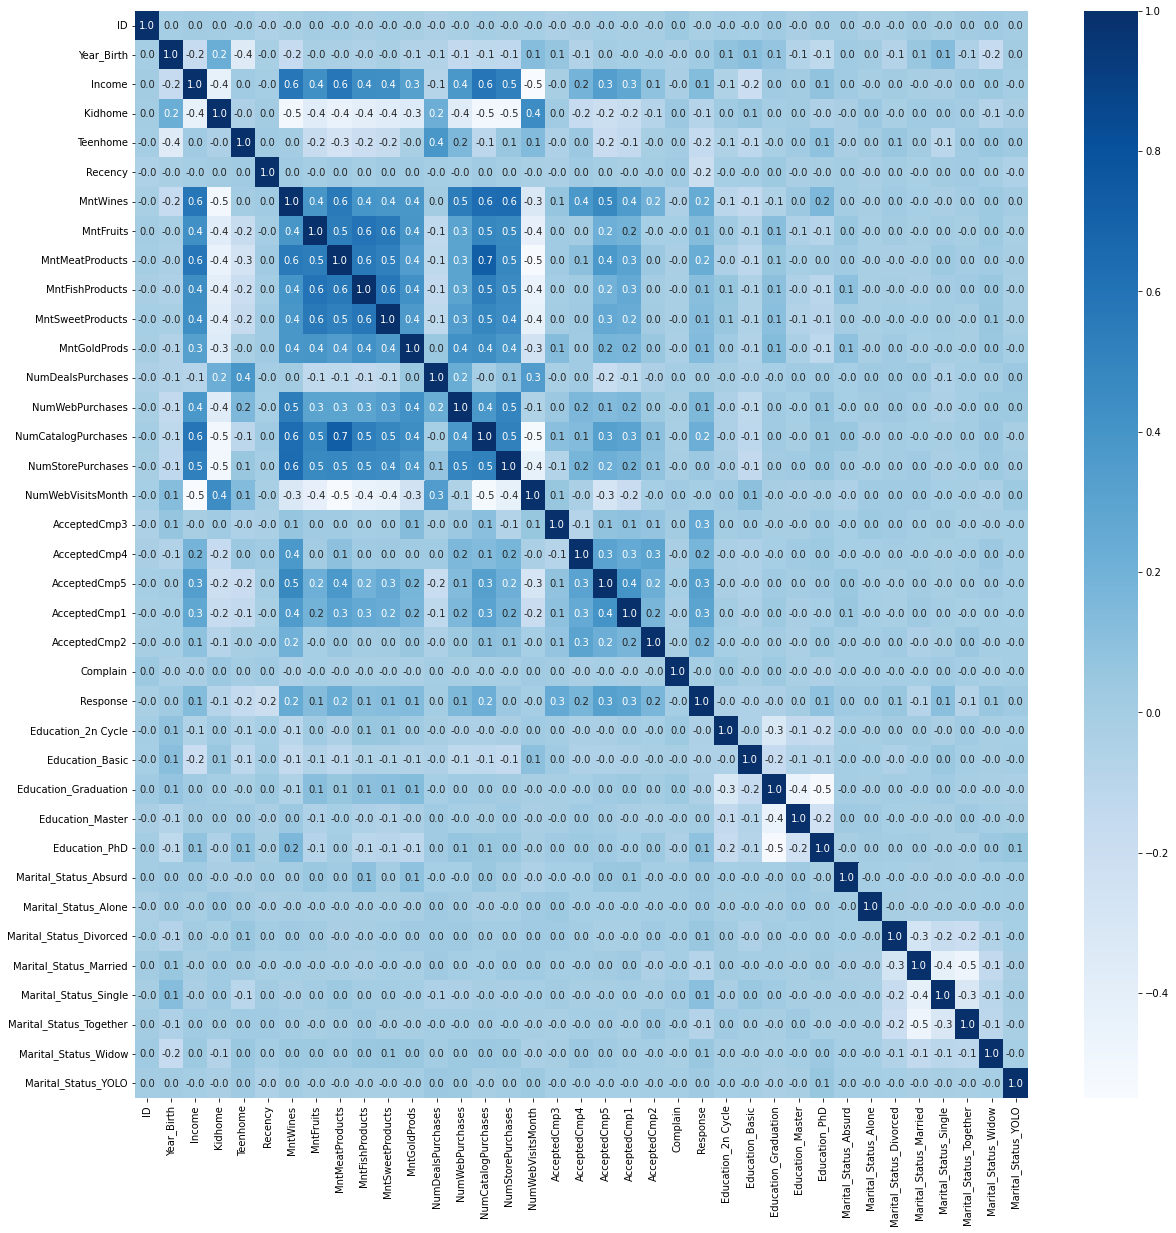

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,fmt='.1f',cmap='Blues')
plt.show()

In [ ]:
df.drop(columns='Recency', inplace = True)
df.drop(columns='Complain', inplace = True)
df.drop(columns='MntGoldProds', inplace = True)
df.drop(columns='NumDealsPurchases', inplace = True)

In [ ]:
df.drop(columns='ID', inplace = True)

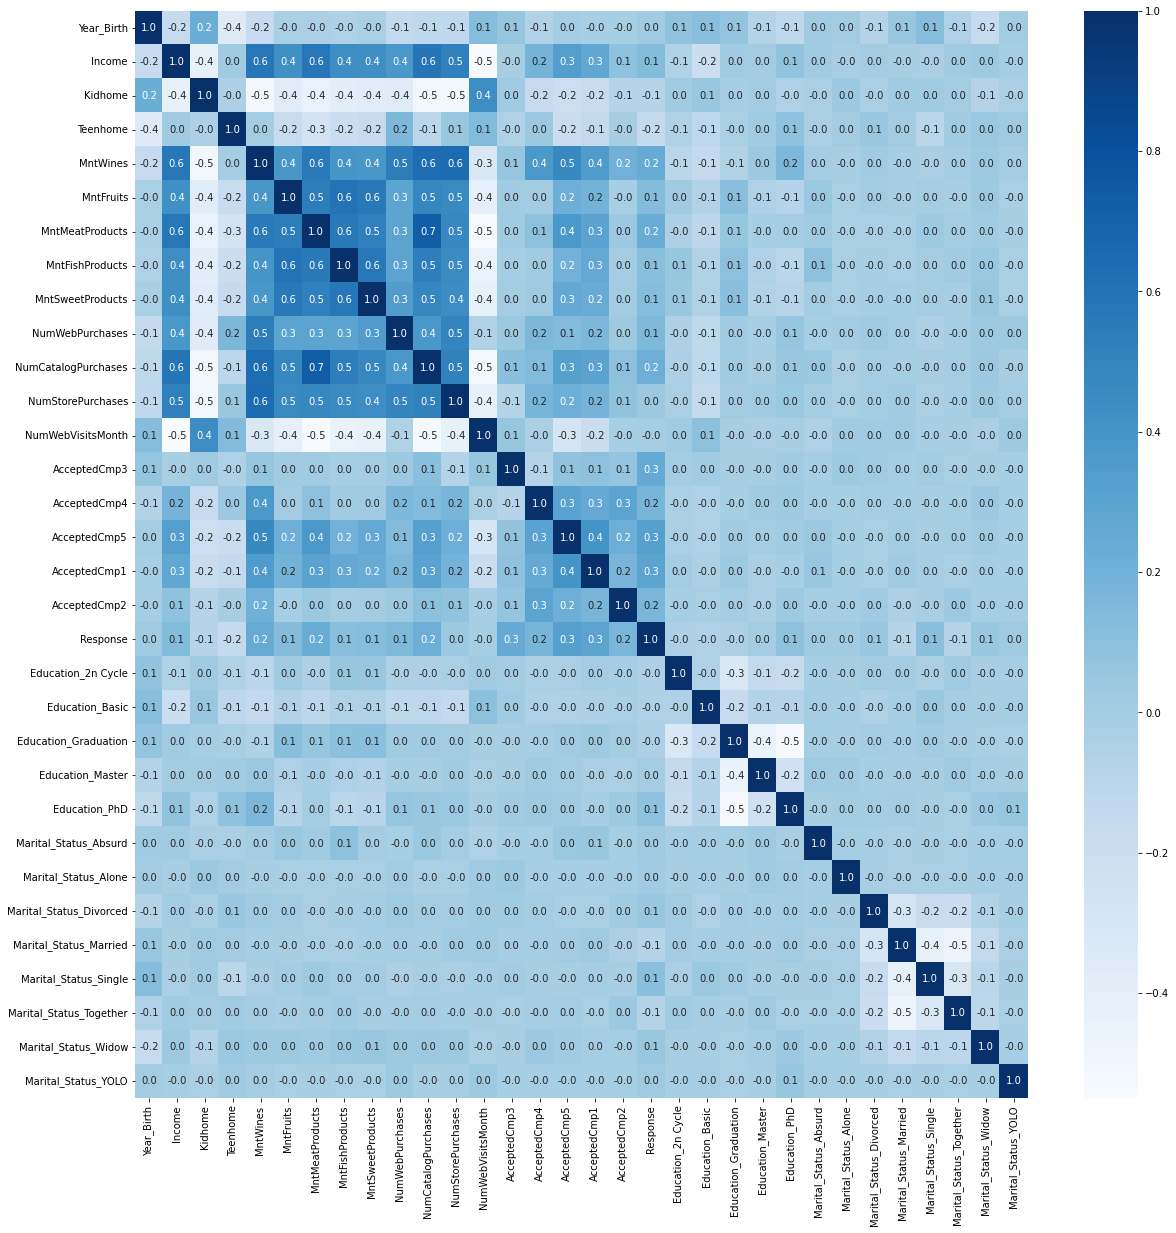

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,fmt='.1f',cmap='Blues')
plt.show()

In [ ]:
colunas = ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [ ]:
z_score = StandardScaler()

In [ ]:
for col in colunas:
  df.col = z_score.fit_transform(df[[col]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


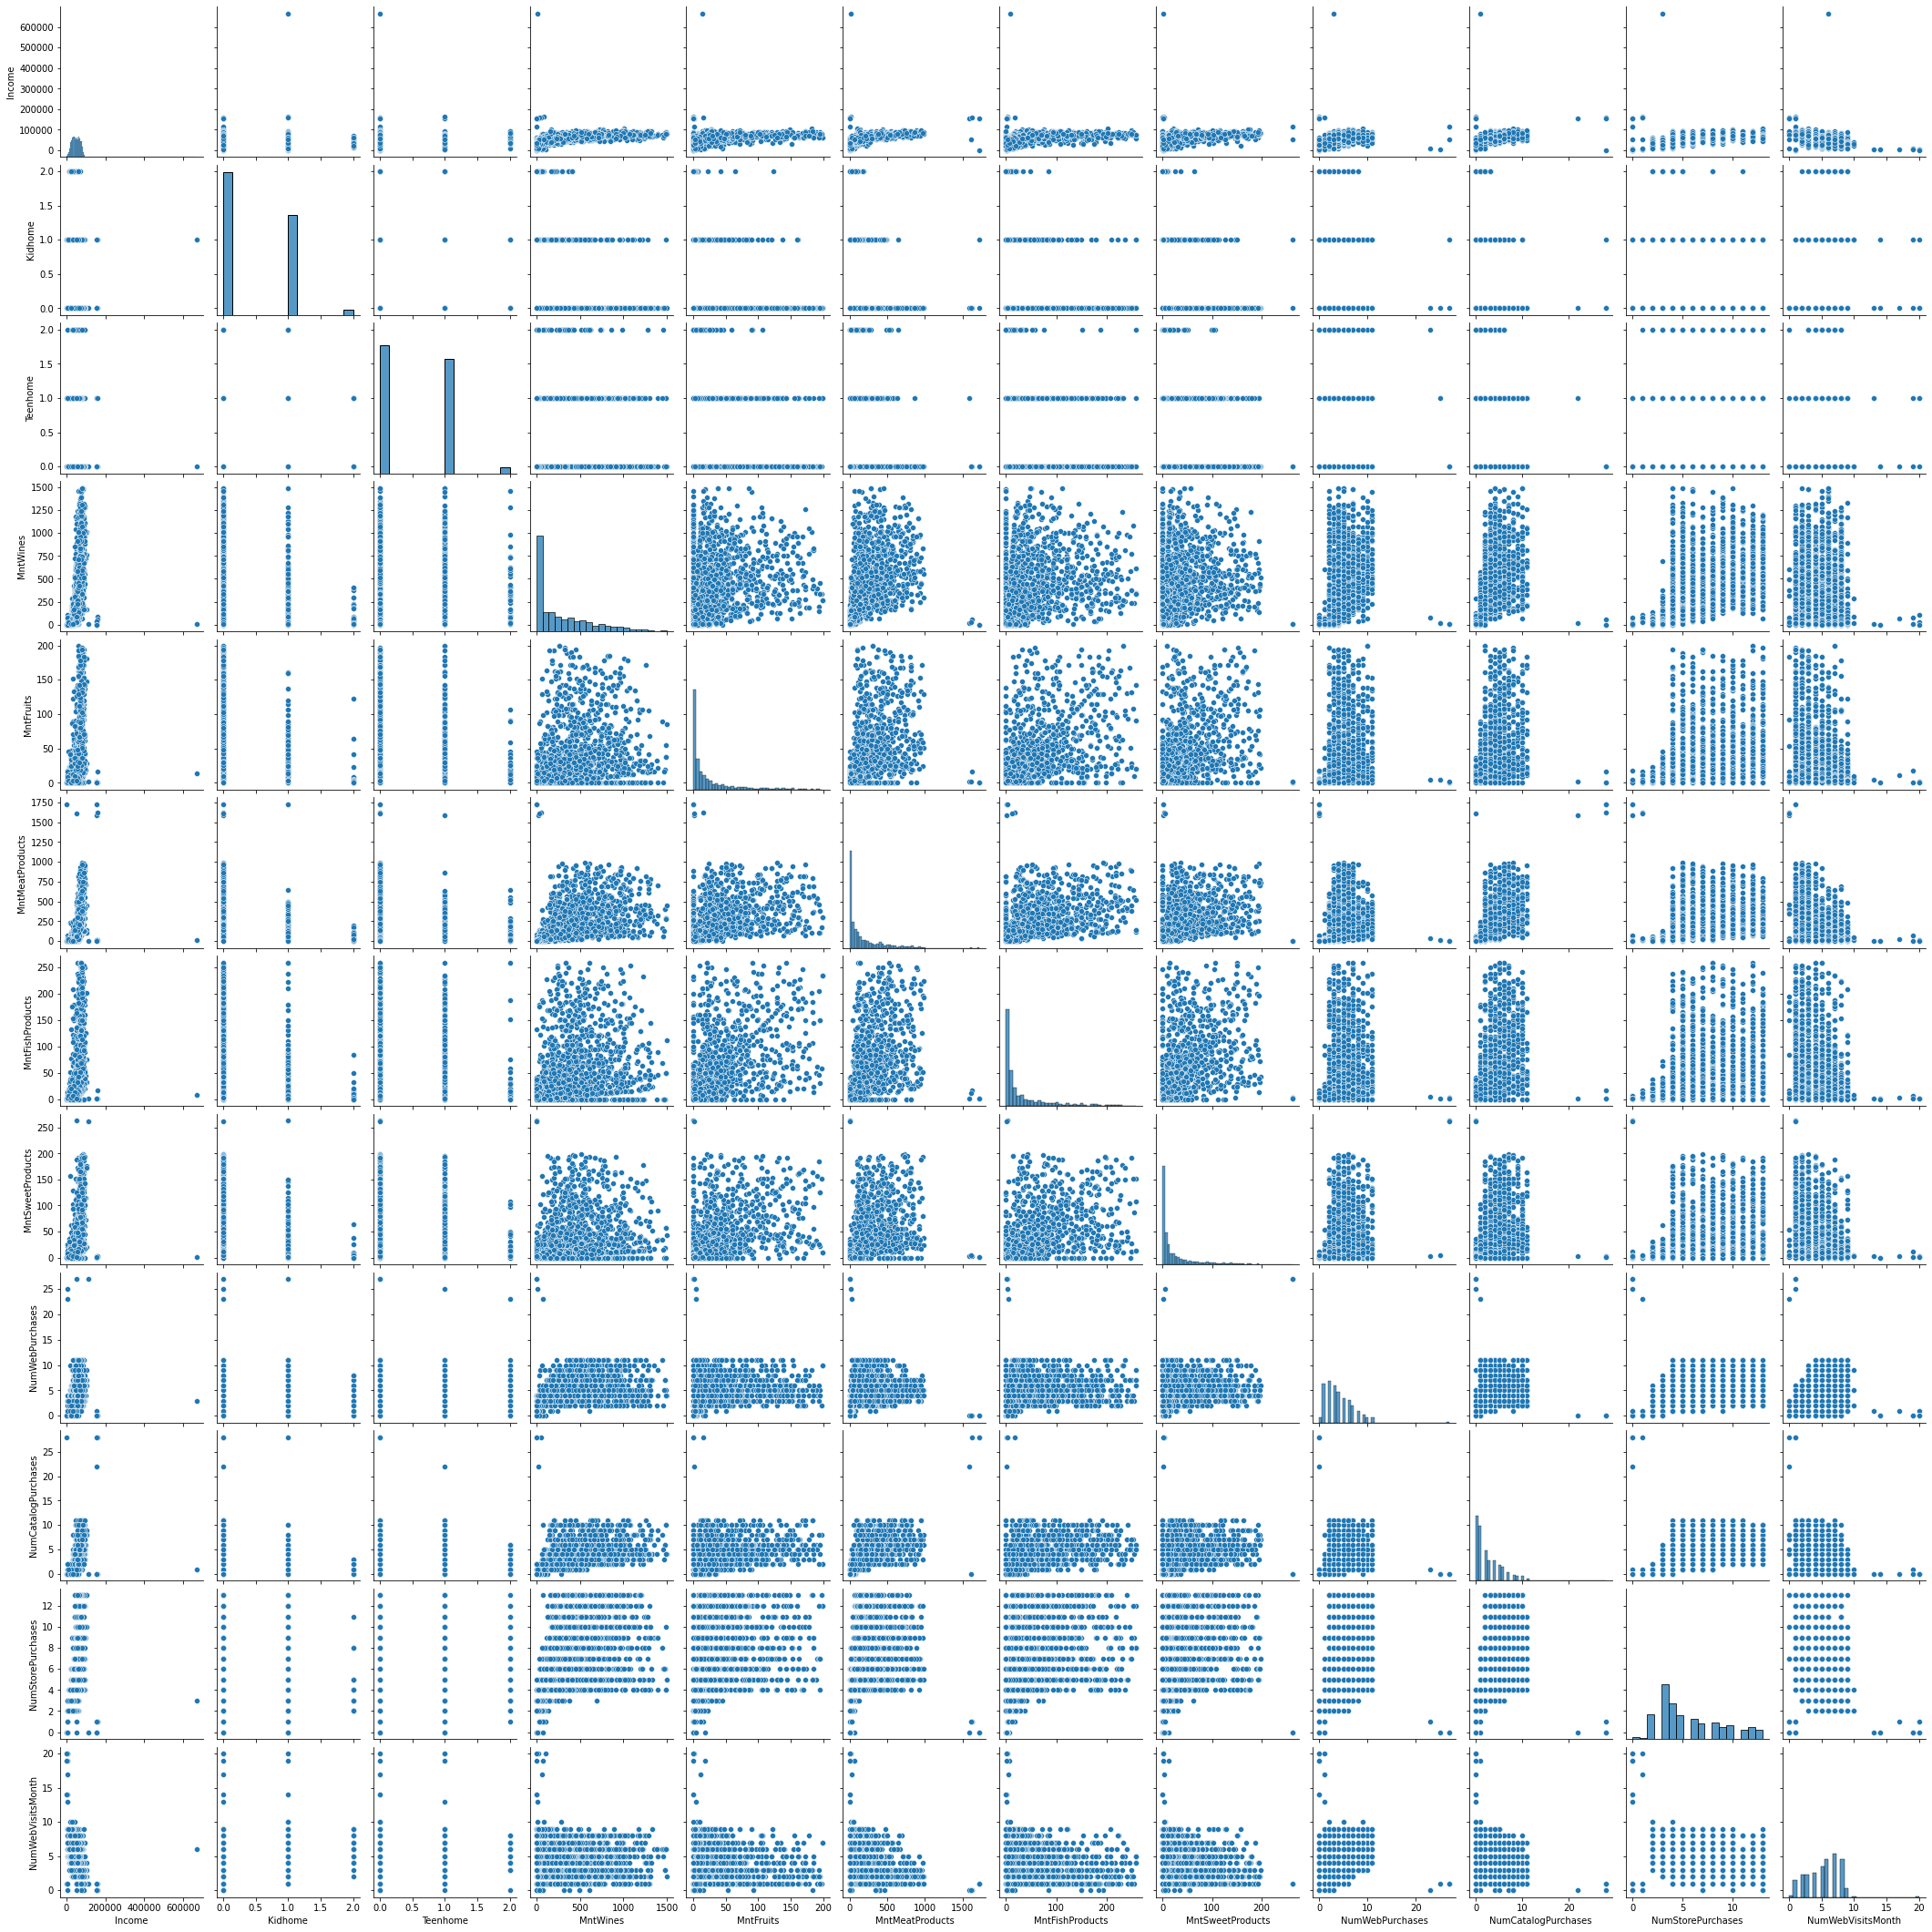

In [ ]:
sns.pairplot(df[colunas])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []
X = df[colunas]
for k in range(2,12):
  km = KMeans(n_clusters=k)
  km.fit(X)
  si_score = silhouette_score(X, km.labels_)
  silhouette_scores.append(si_score)

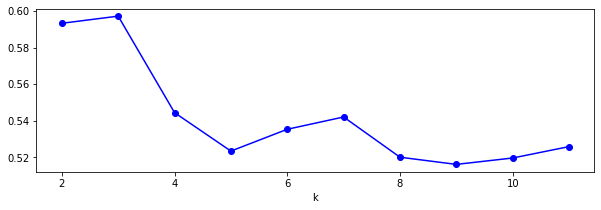

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(range(2,12), silhouette_scores, "bo-")
plt.xlabel("k")
plt.show()

In [ ]:
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df[colunas])
print(y_predicted)

[0 1 0 ... 0 0 0]


In [ ]:
df['cluster']=y_predicted

In [ ]:
for i in range(0,3):
  df_t= df[df.cluster==i]
  print("Cluster", i+1)
  for col in colunas:
    print(col, ":", round(df_t[col].mean(), ndigits= 2 ))
  print("\n")

Cluster 1
Income : 70414.5
Kidhome : 0.15
Teenhome : 0.54
MntWines : 544.19
MntFruits : 46.82
MntMeatProducts : 305.88
MntFishProducts : 65.72
MntSweetProducts : 47.75
NumWebPurchases : 5.49
NumCatalogPurchases : 4.6
NumStorePurchases : 8.07
NumWebVisitsMonth : 3.9


Cluster 2
Income : 35032.42
Kidhome : 0.71
Teenhome : 0.48
MntWines : 83.49
MntFruits : 7.47
MntMeatProducts : 39.46
MntFishProducts : 11.65
MntSweetProducts : 8.08
NumWebPurchases : 2.79
NumCatalogPurchases : 0.89
NumStorePurchases : 3.7
NumWebVisitsMonth : 6.62


Cluster 3
Income : 666666.0
Kidhome : 1.0
Teenhome : 0.0
MntWines : 9.0
MntFruits : 14.0
MntMeatProducts : 18.0
MntFishProducts : 8.0
MntSweetProducts : 1.0
NumWebPurchases : 3.0
NumCatalogPurchases : 1.0
NumStorePurchases : 3.0
NumWebVisitsMonth : 6.0


